In [21]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [22]:
image_path = "../videos/cropped_image.jpg"
image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

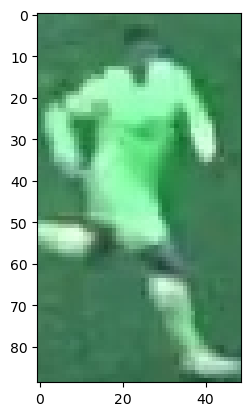

In [23]:
plt.imshow(image)
plt.show()

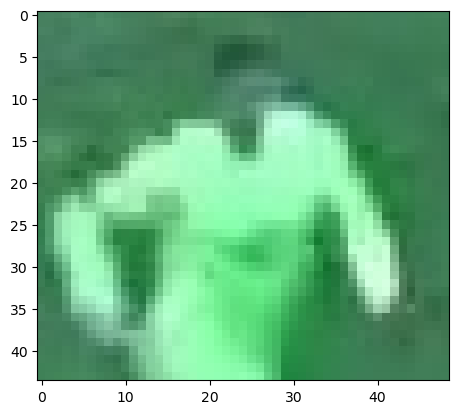

In [24]:
tophalf = image[0: int(image.shape[0]/2), :]
plt.imshow(tophalf)

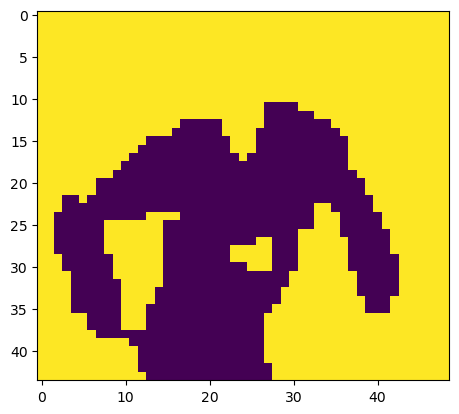

In [31]:
# Reshape image into 2d array
image_2d = tophalf.reshape(-1,3)

# Perform k means clustering with 2 clusters
kMeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get cluster labels
cluster_labels = kMeans.labels_

# reshape the lables into the original
cluster_image = cluster_labels.reshape(tophalf.shape[0], tophalf.shape[1])

plt.imshow(cluster_image)
plt.show()

In [32]:
corner_values = [cluster_image[0, 0], cluster_image[0, -1], cluster_image[-1, 0], cluster_image[-1, -1]]
non_player_cluster = max(set(corner_values), key=corner_values.count)
print(non_player_cluster)

1


In [34]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [36]:
kMeans.cluster_centers_[player_cluster]

array([142.8472973 , 235.65405405, 171.38378378])

In [37]:
kMeans.cluster_centers_[non_player_cluster]

array([ 62.36723164, 130.73658192,  86.46468927])